In [11]:
import copy
import csv
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dir_name = './../results/SL_SFL/mobilenet_v2_cifar10/2024-07-23/'
batch_type_list = ['B128', 'B64']
data_type_list = ['IID', 'N-IID-ClassSep', 'N-IID-Diri-06', 'N-IID-Diri-03']
epoch_type_list = ['R25_E10', 'R50_E5']
extension = 'loss.csv'

data_dict = {'epoch': [], 'loss': []}
batch_dict = {}
epoch_dict = {}
data_type_dict = {}


for data_type in data_type_list:
    data_type_dict[data_type] = copy.deepcopy(data_dict)
for epoch_type in epoch_type_list:
    epoch_dict[epoch_type] = copy.deepcopy(data_type_dict)
for batch_type in batch_type_list:
    batch_dict[batch_type] = copy.deepcopy(epoch_dict)

for batch_type, value1 in batch_dict.items():
    print(f'■ batch type is {batch_type}')

    for epoch_type, value2 in value1.items():
        print(f'\t■ epoch type is {epoch_type}')

        for data_type, value3 in value2.items():
            print(f'\t\t■ data type is {data_type}')
            data_dict ={'epoch': [], 'loss': []}

            file_path = dir_name + '/loss/' + data_type + '_' + batch_type + '_' + epoch_type + '_' + extension
            with open(file_path) as f:
                csv_reader = csv.reader(f, delimiter=',')
                for row in csv_reader:
                    data_dict['loss'].append(float(row[1]))
            if len(data_dict['loss']) == 500:
                data_dict['loss'] = data_dict['loss'][0::2]
            elif len(data_dict['loss']) == 1000:
                data_dict['loss'] = data_dict['loss'][0::4]
            data_dict['epoch'] = np.arange(1, len(data_dict['loss'])+1)
            batch_dict[batch_type][epoch_type][data_type] = data_dict

            print(f'\t\t\t■ data is epoch')
            print('\t\t\t\t', batch_dict[batch_type][epoch_type][data_type]['epoch'])
            print(f'\t\t\t■ data is loss')
            print('\t\t\t\t', batch_dict[batch_type][epoch_type][data_type]['loss'])
            print('\t\t\t\t', len(batch_dict[batch_type][epoch_type][data_type]['loss']))

■ batch type is B128
	■ epoch type is R25_E10
		■ data type is IID
			■ data is epoch
				 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 

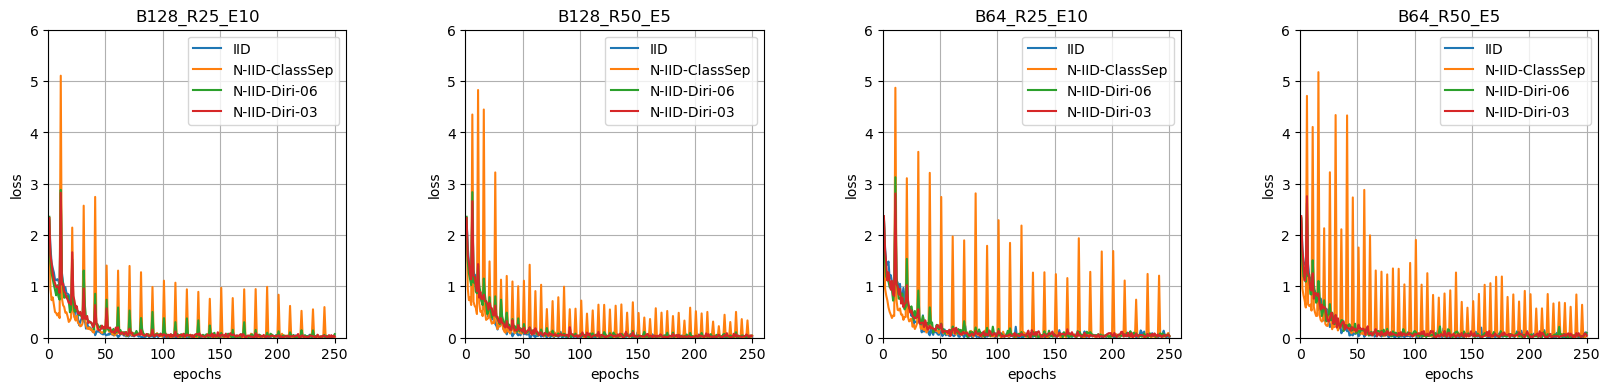

In [18]:
# 各学習パターンごとにプロットして精度を比較
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, batch_type in enumerate(batch_type_list):
    for j, epoch_type in enumerate(epoch_type_list):
        ax = axes[j+i*2]
        for data_type in data_type_list:
            epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']
            loss = batch_dict[batch_type][epoch_type][data_type]['loss']
            ax.plot(epoch, loss, label=data_type)
        ax.set_title(batch_type + '_' + epoch_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.set_xlim((0, 260))
        ax.set_ylim((0, 6))
        ax.grid(True)
        ax.legend()
plt.show()

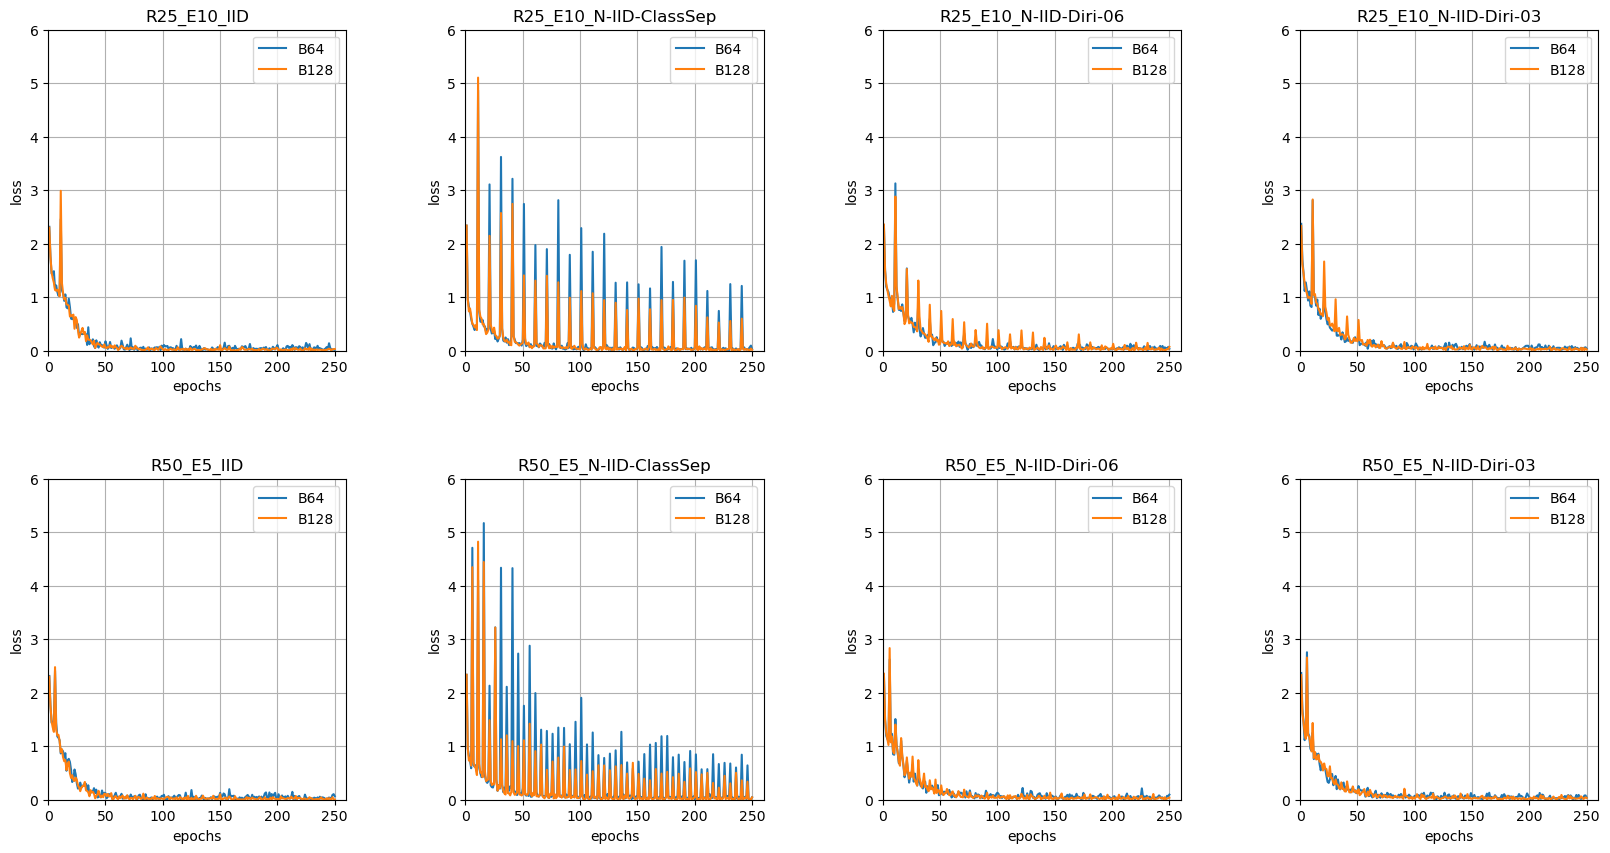

In [19]:
# バッチサイズ間の比較
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, epoch_type in enumerate(epoch_type_list):
    for j, data_type in enumerate(data_type_list):
        ax = axes[i, j]
        # for batch_type in batch_type_list:
        #     epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']
        #     loss = batch_dict[batch_type][epoch_type][data_type]['loss']
        #     ax.plot(epoch, loss, label=batch_type)
        batch_type = batch_type_list[1]
        epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']
        loss = batch_dict[batch_type][epoch_type][data_type]['loss']
        ax.plot(epoch, loss, label=batch_type)
        batch_type = batch_type_list[0]
        epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']
        loss = batch_dict[batch_type][epoch_type][data_type]['loss']
        ax.plot(epoch, loss, label=batch_type)

        ax.set_title(epoch_type + '_' + data_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.set_xlim((0, 260))
        ax.set_ylim((0, 6))
        ax.grid(True)
        ax.legend()

plt.show()
        

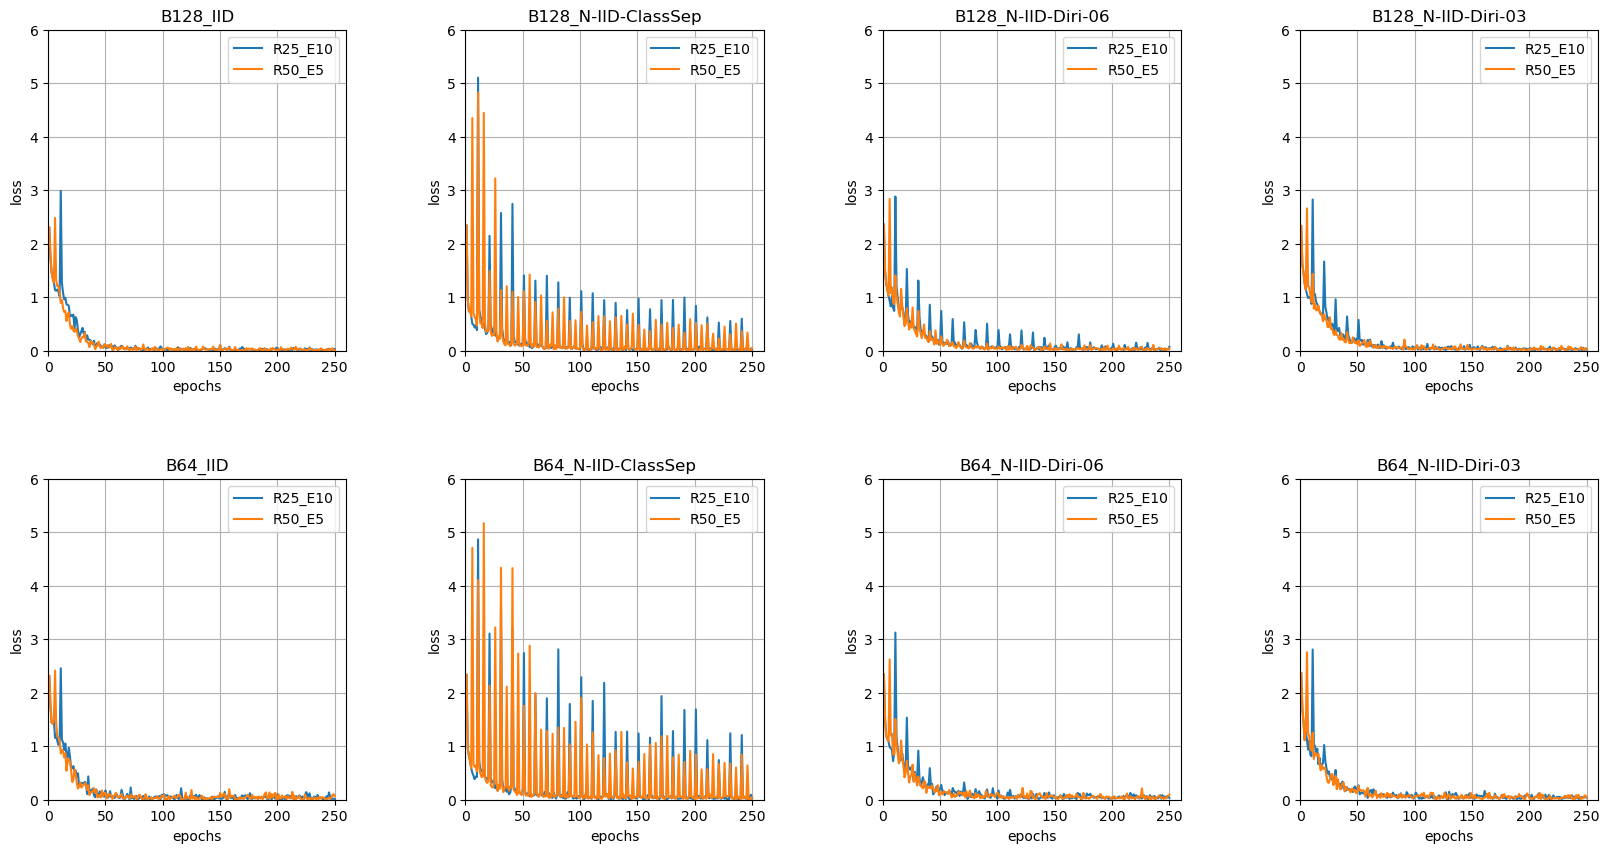

In [20]:
# プロットの設定
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# エポック条件の比較
for i, batch_type in enumerate(batch_type_list):
    for j, data_type in enumerate(data_type_list):
        ax = axes[i, j]
        for epoch_type in epoch_type_list:
            epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']
            loss = batch_dict[batch_type][epoch_type][data_type]['loss']
            ax.plot(epoch, loss, label=epoch_type)
        ax.set_title(batch_type + '_' + data_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.set_ylim((0, 6))  # y軸の上限を100に設定
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

# プロットを表示
plt.show()
